<a href="https://colab.research.google.com/github/2303A52158/AIML_2303A52158/blob/main/SET_1_AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIML LAB EXAM**

**SET 1-LINEAR REGRESSION**

1. Implement simple linear regression on a dataset and plot the regression line.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/hw_200.csv')
print(data.head())

   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30


R-squared: 0.15370545335133745


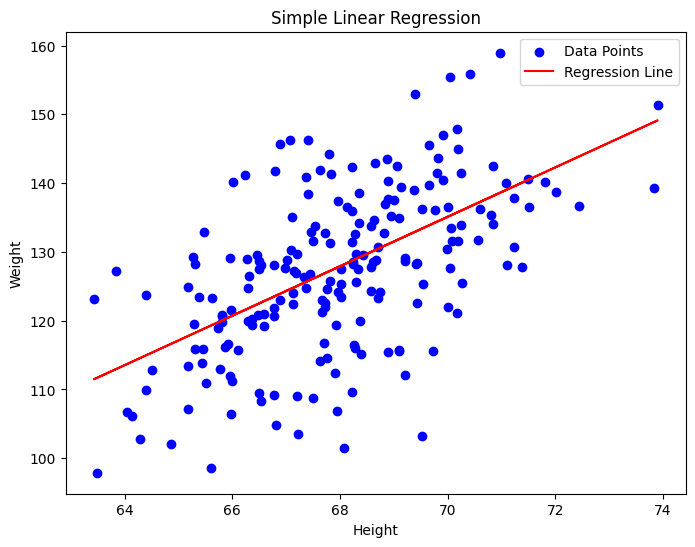

In [39]:
data.rename(columns={" Height(Inches)\"": "Height", " \"Weight(Pounds)\"": "Weight"}, inplace=True)

X = data[['Height']]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


2nd Calculate the R-squared value of the model and interpret it.

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = pd.read_csv('/content/hw_200.csv')

data.rename(columns={" Height(Inches)\"": "Height", " \"Weight(Pounds)\"": "Weight"}, inplace=True)

X = data[['Height']]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Value: {r2}")

if r2 > 0.8:
    print("The model explains a large proportion of the variance in the dependent variable.")
elif r2 > 0.5:
    print("The model has a moderate fit.")
else:
    print("The model has a weak fit.")


R-squared Value: 0.15370545335133745
The model has a weak fit.


3. Perform multiple linear regression with 2-3 independent variables and
compare the results.

R-squared (Multiple Variables): 0.14362867475184948


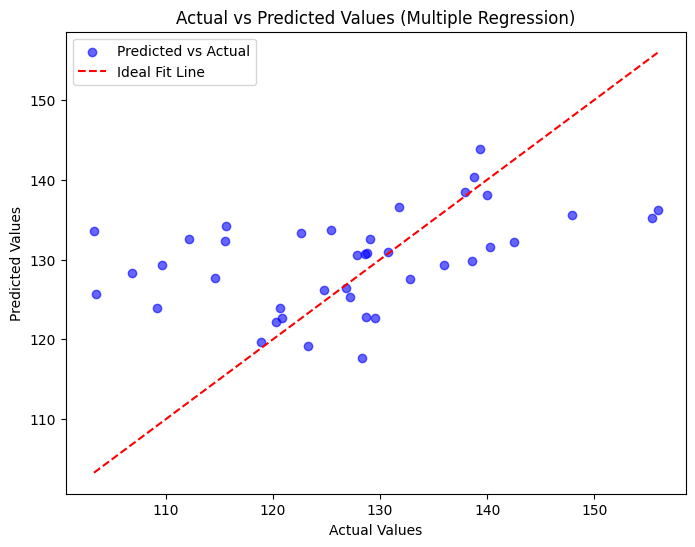

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/hw_200.csv')

data.rename(columns={" Height(Inches)\"": "Height", " \"Weight(Pounds)\"": "Weight"}, inplace=True)
data['Height_squared'] = data['Height'] ** 2


X2 = data[['Height', 'Height_squared']]
y = data['Weight']


X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)


model2 = LinearRegression()
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)

r2_multiple = r2_score(y_test, y_pred2)


print(f"R-squared (Multiple Variables): {r2_multiple}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Multiple Regression)')
plt.legend()
plt.show()



4. Plot the residuals and check for any patterns.

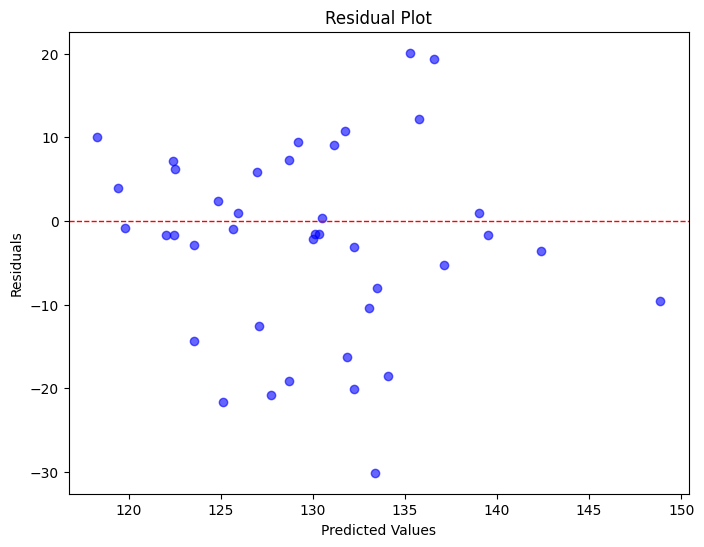

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/hw_200.csv')

data.rename(columns={" Height(Inches)\"": "Height", " \"Weight(Pounds)\"": "Weight"}, inplace=True)

X = data[['Height']]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/hw_200.csv')

data.rename(columns={" Height(Inches)\"": "Height", " \"Weight(Pounds)\"": "Weight"}, inplace=True)

X = data[['Height']]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_no_scaling = LinearRegression()
model_no_scaling.fit(X_train, y_train)

y_pred_no_scaling = model_no_scaling.predict(X_test)
mse_no_scaling = mean_squared_error(y_test, y_pred_no_scaling)
r2_no_scaling = r2_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LinearRegression()
model_with_scaling.fit(X_train_scaled, y_train)

y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
mse_with_scaling = mean_squared_error(y_test, y_pred_with_scaling)
r2_with_scaling = r2_score(y_test, y_pred_with_scaling)

print(f"Without Scaling: MSE = {mse_no_scaling}, R2 = {r2_no_scaling}")
print(f"With Scaling: MSE = {mse_with_scaling}, R2 = {r2_with_scaling}")

if r2_with_scaling > r2_no_scaling:
    print("Feature scaling improved the model's performance.")
elif r2_with_scaling == r2_no_scaling:
    print("Feature scaling made no significant difference.")
else:
    print("Feature scaling did not improve the model.")


Without Scaling: MSE = 134.94311638223607, R2 = 0.15370545335133745
With Scaling: MSE = 134.94311638223604, R2 = 0.15370545335133767
Feature scaling improved the model's performance.
